# Final Project
## Linh Trinh - 20461296

The original MNIST image dataset of handwritten digits is an useful baseline for image-based machine learning methods, moreover, experts are working to upgrade it and build drop-in replacements that are more difficult for computer vision and original for real-world applications.The Sign Language MNIST is offered here to encourage the community to produce more drop-in replacements. It uses the same CSV format as the other MNISTs, with labels and pixel values in single rows. With 24 classes of letters, the American Sign Language letter database of hand gestures is a multi-class problem (excluding J and Z which require motion)

The dataset format is designed to closely resemble the old MNIST format. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (due to gesture motions, there are no cases for 9=J or 25=Z). The training data (27,455 cases) and test data (7172 cases) are about half the size of the regular MNIST, but they are generally identical, with the exception of a header row of labels, pixel1, pixel2, .. pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. Multiple users repeating the move against various backgrounds were represented in the original hand gesture image data. 

### Task 1. Loading the data

In [19]:
import string
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import numba

In [2]:
data_train = pd.read_csv('sign_mnist_train.csv')
data_test = pd.read_csv('sign_mnist_test.csv')

In [3]:
print(data_train.shape)
data_train

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
print(data_test.shape)
data_test

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


Putting labels into X and y training variables

In [5]:
y_train = data_train['label'].to_numpy()
X_train = data_train.drop(columns = ['label'], axis =1 )

Putting labels into X and y testing variables

In [6]:
y_test = data_test['label'].to_numpy()
X_test = data_test.drop(columns = ['label'],axis = 1)

Visualizing number of digits classes 

Text(0.5, 1.0, 'Distribution classes')

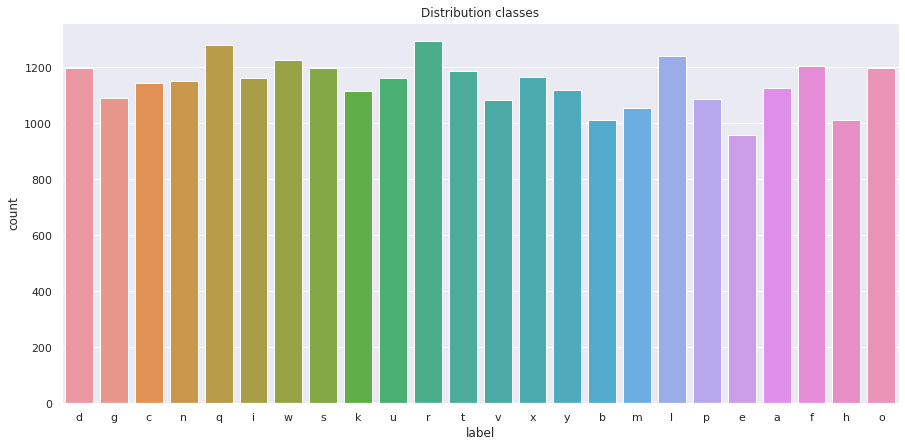

In [7]:
plt.figure(figsize = (15,7))
alpha_dict = {idx:letter for idx, letter in enumerate(string.ascii_lowercase)}
alpha_labels = data_train.label.apply(lambda x: alpha_dict[x])
sns.countplot(x=alpha_labels)
plt.title('Distribution classes')

Plotting out some samples to help visualing it easier

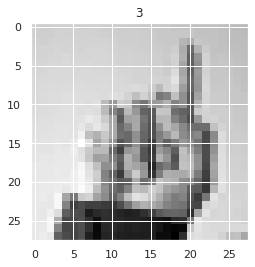

In [8]:
img = X_train.iloc[9].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(data_train.iloc[9,0])
plt.show()

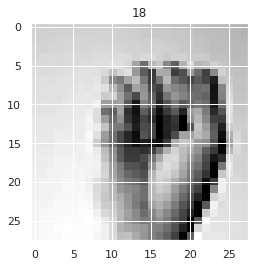

In [9]:
img = X_train.iloc[20].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(data_train.iloc[20,0])
plt.show()

### Task 2. Logistic Regression

The entire project is dedicated to predicting the letter (expressed in number) of an image by training through multiple images, presented by pixels, therefore, multiclass logistic regression is chosen as one of the methods. This is also a supervised method since both train and test dataset includes labels which help to report scores, as a way to express accuracy, after data is run through. 

In [7]:

class myLogisticRegression():
    """ Logistic Regression classifier -- this also works for the multiclass case.
    Parameters:
    -----------
    learning_rate: float
        The step length that will be taken when following the negative gradient during
        training.
    """
    
    def __init__(self, learning_rate=.1, opt_method = 'SGD', num_epochs = 50, size_batch = 20):
        
        # learning rate can also be in the fit method
        self.learning_rate = learning_rate
        self.opt_method = opt_method
        self.num_epochs = num_epochs
        self.size_batch = size_batch
        

    def fit(self, data, y, n_iterations = 1000):
        """ 
        Determine the optimal parameter W for the input data x,y 
        """
        self.K = max(y)+1 
        ones = np.ones((data.shape[0],1))  
        X = np.concatenate((ones, data), axis = 1)
        eta = self.learning_rate
        
        W  = np.zeros((np.shape(X)[1],max(y)+1)) 
        if self.opt_method == 'GD':
            for k in range(n_iterations):
                dW = self.loss_gradient(W,X,y) 
                W = W - eta * dW 
                # this step is for inspection purposes
                if k % 500 == 0: 
                    print("loss after", k+1, "iterations is: ", self.loss(W,X,y))
        
        if self.opt_method == 'SGD':
            N = X.shape[0]
            num_epochs = self.num_epochs
            size_batch = self.size_batch
            num_iter = 0
            for e in range(num_epochs):
                shuffle_index = np.random.permutation(N) 
                for m in range(0,N,size_batch):   
                    i = shuffle_index[m:m+size_batch] 
                    dW = self.loss_gradient(W,X[i,:],y[i])
                    W = W - eta * dW 
                
                    if e % 1 == 0 and num_iter % 50 ==0: 
                        print("loss after", e+1, "epochs and ", num_iter+1, "iterations is: ", self.loss(W,X,y))
        
                    num_iter = num_iter +1  
            
        self.coeff = W
        
    def predict(self, data):
        """ 
         Predict the output valutes for the input value x, based on the
        trained parameter
        """
        ones = np.ones((data.shape[0],1))
        X = np.concatenate((ones, data), axis = 1) 
        W = self.coeff # the estimated W
        y_pred = np.argmax(self.sigma(X,W), axis =1) 
        return y_pred
    
    def score(self, data, y_true):
        '''
        Calculate the R-square on the dataset with input x and y
        
        Return: float, the R^2 value 
        '''
        ones = np.ones((data.shape[0],1)) 
        X = np.concatenate((ones, data), axis = 1) 
        y_pred = self.predict(data)
        acc = np.mean(y_pred == y_true) 
        return acc
    
    def sigma(self,X,W): 
        '''
        Return the softmax probability
        '''
        s = np.exp(np.matmul(X,W))
        total = np.sum(s, axis=1).reshape(-1,1)
        return s/total
    
    def loss(self,W,X,y):
        '''
        Loss calculation
        '''
        f_value = self.sigma(X,W)
        K = self.K 
        loss_vector = np.zeros(X.shape[0])
        for k in range(K):
            loss_vector += np.log(f_value+1e-10)[:,k] * (y == k) 
        return -np.mean(loss_vector)
                          
    def loss_gradient(self,W,X,y):
        f_value = self.sigma(X,W)
        K = self.K 
        dLdW = np.zeros((X.shape[1],K))
        for k in range(K):
            dLdWk =(f_value[:,k] - (y==k)).reshape(-1,1)*X 
            dLdW[:,k] = np.mean(dLdWk, axis=0)   
        return dLdW

In [8]:
lg_sgd = myLogisticRegression(learning_rate=1e-6, opt_method = 'SGD', num_epochs = 15, size_batch = 40)

In [9]:
%%time
lg_sgd.fit(X_train,y_train)

loss after 1 epochs and  1 iterations is:  3.674086053528487
loss after 1 epochs and  51 iterations is:  3.067389637043897
loss after 1 epochs and  101 iterations is:  2.687957352773858
loss after 1 epochs and  151 iterations is:  2.5686182274349165
loss after 1 epochs and  201 iterations is:  2.6321292194702988
loss after 1 epochs and  251 iterations is:  2.2737716019350622
loss after 1 epochs and  301 iterations is:  2.0710745524364866
loss after 1 epochs and  351 iterations is:  1.9738627746028912
loss after 1 epochs and  401 iterations is:  1.9084455272963852
loss after 1 epochs and  451 iterations is:  1.8940081042547179
loss after 1 epochs and  501 iterations is:  1.7673464946129083
loss after 1 epochs and  551 iterations is:  1.8500782458586438
loss after 1 epochs and  601 iterations is:  1.7153315972709298
loss after 1 epochs and  651 iterations is:  1.6432002507159893
loss after 2 epochs and  701 iterations is:  1.5500620274762866
loss after 2 epochs and  751 iterations is:  1

loss after 10 epochs and  6351 iterations is:  0.619337625644083
loss after 10 epochs and  6401 iterations is:  0.6258982750579771
loss after 10 epochs and  6451 iterations is:  0.5889861870183595
loss after 10 epochs and  6501 iterations is:  0.6006365291384546
loss after 10 epochs and  6551 iterations is:  0.6044135029102005
loss after 10 epochs and  6601 iterations is:  0.5898940948813226
loss after 10 epochs and  6651 iterations is:  0.6188797946716235
loss after 10 epochs and  6701 iterations is:  0.6215543883289083
loss after 10 epochs and  6751 iterations is:  0.5945073752780783
loss after 10 epochs and  6801 iterations is:  0.5733003796523918
loss after 10 epochs and  6851 iterations is:  0.5895950917219732
loss after 11 epochs and  6901 iterations is:  0.5741615474644287
loss after 11 epochs and  6951 iterations is:  0.6043510426558869
loss after 11 epochs and  7001 iterations is:  0.5848139733345857
loss after 11 epochs and  7051 iterations is:  0.5955083020237424
loss after 

In [10]:
lg_sgd.score(X_test,y_test)

0.6412437255995538

In [20]:
y_pred = lg_sgd.predict(X_test)
print(f'Testing accuracy: {np.mean(y_pred==y_test)*100:.4}%')

Testing accuracy: 64.12%


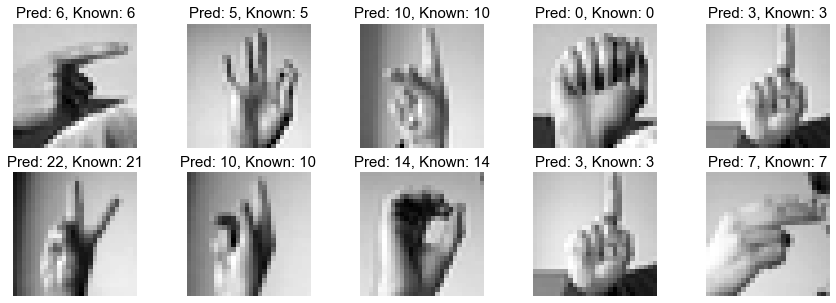

In [22]:
X_test = X_test.to_numpy()
_, axes = plt.subplots(2,5, figsize=(15, 5))
axes = axes.reshape(-1) 

for i in range(10):
    axes[i].axis('off') # hide the axes
    axes[i].imshow(X_test[i,:].reshape(28,28), cmap = 'gray')       
    axes[i].set_title("Pred: "+str(y_pred[i])+", Known: "+str(y_test[i]),
                      color= 'black', fontsize=15)  
plt.show()

In this part, Stochastic Gradient Descent (SGD) is chosen and adapted into multiclass regression as the method to fit variables because of its efficiency in optimization and time-saving characteristic. The accuracy of test data after being trained with train data is approximately 65%, which can be considered a quite good result. Moreover, the predicted result when comparing with lables showing by the images above is quite beyond expectation with its accuracy.

### Task 3: Principle Component Analysis

In [11]:
class myPCA():
    '"PCA dimensional reduction method"'
    
    def __init__(self, n_components = 2):
        
        self.n_c = n_components
    
    
    def fit(self,X):
        
        '"Multiple variables are explained into principle components"'
        cov_mat = np.cov(X.T) 
        eig_val, eig_vec = np.linalg.eigh(cov_mat)
        eig_val = np.flip(eig_val) 
        eig_vec = np.flip(eig_vec,axis=1)
        self.eig_values = eig_val[:self.n_c] 
        self.principle_components = eig_vec[:,:self.n_c] 
        self.variance_ratio = self.eig_values/eig_val.sum()
    
    def transform(self,X):
        '"project centered data onto principle components"'
        return np.matmul(X-X.mean(axis = 0),self.principle_components)

In [12]:
pca = myPCA(n_components = 15)
pca.fit(X_test)
X_test_pca = pca.transform(X_test)

In [13]:
X_test_pca.shape

(7172, 15)

In [14]:
X_test_new = X_test_pca.to_numpy()

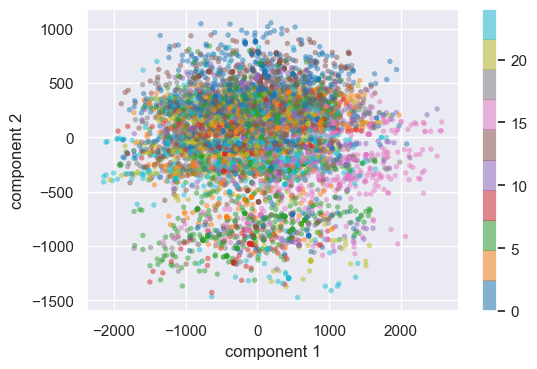

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_test_new[:, 0], X_test_new[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Task 4: Try other methods using Scikit-learn

1. Train dataset with kNN - a supervised method

**Intuitions**: We don't have to derive the mapping formula directly to forecast the test sample; we merely look at its "near friends" in the training dataset and follow their labels! **Follow in the footsteps of your neighbors**.

**Mathematical Description**: Given a test sample $\mathbf{x}$ from **test** dataset, the kNN classifier first identifies the neighbors $k$ points in the **training** data that are closest to $\mathbf{x}$, whose indices are represented by $\mathcal{N}_{x}$. It then estimates the probability that $\mathbf{x}$ belongs to class $j$ by $P\big(y= j| \mathbf{x} \big)$ computing the fraction of points in $\mathcal{N}$ whose label(s) actually equal $j$:

$$
P\big(y= j| \mathbf{x} \big)\approx  \frac{1}{k} \sum_{i\in \mathcal{N}_{x}} 1\{ y^{(i)} = j\}.
$$

We finally determine its class by picking up the class with largest probability.

*Remark*: The similar philosophy can also extend to regression problem, which is called kNN regression.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 20)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test,y_test)

0.7731455660903513

2. Train dataset with Decision Tree - another supervised method

What is the process by which humans make classifications? Instead of employing mathematical equations, we make a sequence of "decisions" based on the key characteristics we've learned from previous experiences.

**Intuitions**: We may naturally solve the classification problem by continually setting thresholds for distinct features (many if-else conditions — constructing a flow-chart or decision tree structure).

**Mathematical Considerations**: How to decide the appropriate thresholds and the order of if-else conditions? **Gini impurity** or **Entropy** (not required in this class). You only need to know that these tresholds/order of conditions are determined by the training dataset, using certain metrics to select. Different concerete strategies lead to various algorithms, known as ID3, CART, C4.5...

For the basic requirements, in this course we only ask you to call the package and understand how to interpret the results.


In [16]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.4301450083658673

3. Train dataset with Random Forest - another supervised method

Despite the fact that the concept of a decision tree is simple, the method is known for its over-fitting and high variance.

We can construct a "forest" of many trees to make the decision tree more robust, and then let the forest of trees "vote" — naturally, we believe this will lower the variance in choice.

In two approaches (this is also known as bootstrapping in statistics), each decision tree can be "random" (and thus different from the others):
- We only use a random selection of **features** as training dataset in each iteration.
- We only use a random subset of **samples** as the training dataset in each run.

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, max_samples = 0.5, max_depth=5, random_state=0, n_jobs = -1) 
rf_clf.fit(X_train, y_train) 
rf_clf.score(X_test, y_test)

0.4795036252091467

4. Train dataset with Multidimensional scaling (MDS) - an unsupervised method

**Basic intuition:** In original high dimensional data, we can construct $n\times n$ dissimilarity (distance) matrix $d_{ij}=\mathbf{d}(\mathbf{x}^{i},\mathbf{x}^{j})$. We aim to optimize the low-dimensional embedding $\mathbf{y}^{i}$ such that the distance in the low-dimensional $\mathbb{R}^{k}$ approximates the distance in high-dimensional space, i.e. $||\mathbf{y}^{(i)}-\mathbf{y}^{(j)}||\approx d_{ij}$. 

**How to do it:** many practical algorithms are available. Can be based on analytical solution + eigen decomposition (known as **classical MDS**) or numerical optimization (**metric MDS**). It is worth noting that in classical MDS, if the both $d_{ij}$ in high-dimensional space and norm in low-dimensional space is chosen as the euclidean disance, then it is equivalent to PCA.


In [18]:
from sklearn.manifold import MDS
mds = MDS(n_jobs = -1) 
X_mds = mds.fit_transform(X_test)

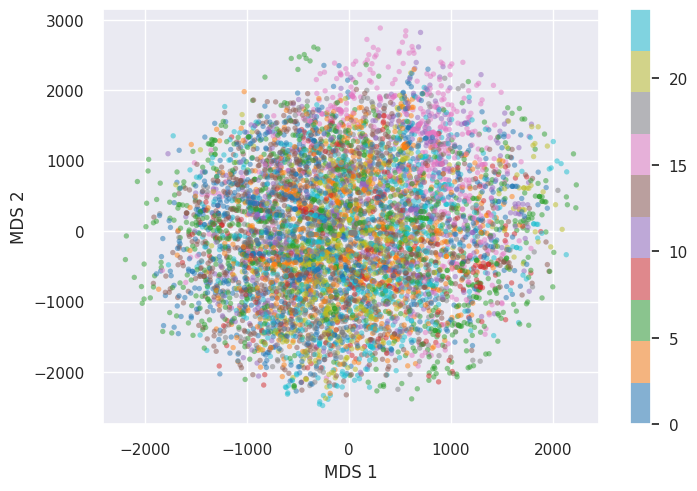

In [40]:
figure = plt.figure(dpi=100)
plt.scatter(X_mds[:, 0], X_mds[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.colorbar();

### Task 5: Try other python package in Machine Learning - particularly Pycaret and cuML

Setting up environment in Pycaret

In [19]:
data_train['label'] = data_train.label.astype('category')

In [34]:
data_test['label'] = data_test.label.astype('category')

In [21]:
pip install pycaret

     |████████████████████████████████| 261 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 24.2 MB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 59.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 54.6 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 54 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 1.1 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 46.5 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.7 MB 52.8 MB/s eta 0:00:01
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl s

In [22]:
from pycaret.classification import *
exp_clf101 = setup(data = data_train, target = 'label',use_gpu = True )

,Description,Value
0,session_id,424
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 10: 2, 11: 3, 12: 4, 13: 5, 14: 6, 15: 7, 16: 8, 17: 9, 18: 10, 19: 11, 2: 12, 20: 13, 21: 14, 22: 15, 23: 16, 24: 17, 3: 18, 4: 19, 5: 20, 6: 21, 7: 22, 8: 23"
4,Original Data,"(27455, 785)"
5,Missing Values,False
6,Numeric Features,784
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

Comparing all models

In [23]:
best = compare_models(include = ['lr','dt','knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9987,1.0000,0.9987,0.9987,0.9987,0.9986,0.9986,1.7270
knn,K Neighbors Classifier,0.9937,0.9998,0.9937,0.9938,0.9937,0.9934,0.9934,0.4850
dt,Decision Tree Classifier,0.8519,0.9227,0.8520,0.8535,0.8519,0.8454,0.8455,10.5220


Compare models

In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,cuml.linear_model.logistic_regression.Logistic...,True
knn,K Neighbors Classifier,cuml.neighbors.kneighbors_classifier.KNeighbor...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,cuml.linear_model.mbsgd_classifier.MBSGDClassi...,True
rbfsvm,SVM - Radial Kernel,pycaret.internal.cuml_wrappers.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,cuml.linear_model.ridge.Ridge,True


Choose logistic regression as my model because of its good performance on this dataset

In [25]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9984,1.0000,0.9984,0.9985,0.9984,0.9984,0.9984
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9990,1.0000,0.9990,0.9990,0.9990,0.9989,0.9989
4,0.9995,1.0000,0.9994,0.9995,0.9995,0.9995,0.9995
5,0.9974,1.0000,0.9975,0.9974,0.9974,0.9973,0.9973
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9979,1.0000,0.9980,0.9980,0.9979,0.9978,0.9978
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9995,1.0000,0.9995,0.9995,0.9995,0.9995,0.9995


In [26]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9761,0.9996,0.9767,0.9766,0.9762,0.9750,0.9750
1,0.9735,0.9991,0.9743,0.9741,0.9736,0.9723,0.9723
2,0.9901,0.9998,0.9904,0.9903,0.9901,0.9897,0.9897
3,0.9657,0.9992,0.9667,0.9665,0.9656,0.9642,0.9642
4,0.9891,0.9998,0.9891,0.9893,0.9891,0.9886,0.9886
5,0.9761,0.9995,0.9764,0.9764,0.9761,0.9750,0.9750
6,0.9792,0.9997,0.9793,0.9795,0.9792,0.9783,0.9783
7,0.9776,0.9996,0.9779,0.9781,0.9775,0.9766,0.9767
8,0.9865,0.9997,0.9869,0.9866,0.9865,0.9859,0.9859
9,0.9901,0.9999,0.9902,0.9903,0.9901,0.9897,0.9897


In [27]:
print(tuned_lr)

LogisticRegression(penalty='l1', tol=0.0001, C=9.446, fit_intercept=True, max_iter=1000, linesearch_max_iter=50, verbose=4, l1_ratio=None, solver='qn', handle=<cuml.raft.common.handle.Handle object at 0x7f0581e5ad10>, output_type='numpy')


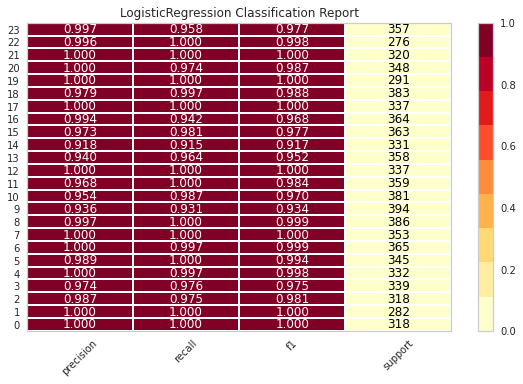

In [28]:
plot_model(tuned_lr, plot = 'class_report')

In [29]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
final_lr = finalize_model(tuned_lr)

[W] [03:36:06.782537] QWL-QN: max iterations reached
[W] [03:36:08.738750] QWL-QN: max iterations reached
[W] [03:36:10.684224] QWL-QN: max iterations reached
[W] [03:36:12.686513] QWL-QN: max iterations reached
[W] [03:36:14.710479] QWL-QN: max iterations reached
[W] [03:36:16.800437] QWL-QN: max iterations reached
[W] [03:36:18.939587] QWL-QN: max iterations reached
[W] [03:36:21.836855] QWL-QN: max iterations reached
[W] [03:36:24.533949] QWL-QN: max iterations reached
[W] [03:36:26.450194] QWL-QN: max iterations reached


In [32]:
print(final_lr)

LogisticRegression(penalty='l1', tol=0.0001, C=9.446, fit_intercept=True, max_iter=1000, linesearch_max_iter=50, verbose=4, l1_ratio=None, solver='qn', handle=<cuml.raft.common.handle.Handle object at 0x7f0581e5ad70>, output_type='numpy')


In [33]:
predict_model(final_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9924,0.9999,0.9928,0.9925,0.9924,0.9920,0.9920


,pixel3,pixel4,pixel6,pixel8,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label,Label,Score
0,162.0,163.0,172.0,179.0,186.0,187.0,188.0,190.0,191.0,191.0,...,138.0,136.0,137.0,138.0,132.0,161.0,225.0,23,23,0.8990
1,189.0,190.0,191.0,191.0,191.0,190.0,188.0,188.0,190.0,191.0,...,219.0,219.0,217.0,216.0,215.0,213.0,212.0,8,8,0.8179
2,216.0,217.0,222.0,224.0,225.0,226.0,228.0,228.0,230.0,229.0,...,62.0,90.0,158.0,253.0,255.0,255.0,255.0,12,12,0.9292
3,104.0,123.0,0.0,65.0,70.0,73.0,75.0,79.0,84.0,91.0,...,105.0,87.0,86.0,93.0,94.0,99.0,93.0,16,16,0.9998
4,86.0,90.0,111.0,140.0,152.0,156.0,161.0,162.0,165.0,169.0,...,210.0,212.0,214.0,215.0,215.0,216.0,216.0,21,21,0.5319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8232,142.0,146.0,156.0,163.0,168.0,170.0,171.0,173.0,173.0,177.0,...,104.0,103.0,102.0,102.0,100.0,98.0,98.0,18,18,0.8881
8233,191.0,191.0,190.0,187.0,184.0,184.0,184.0,183.0,183.0,182.0,...,208.0,206.0,205.0,203.0,201.0,200.0,197.0,7,7,0.7670
8234,103.0,118.0,135.0,157.0,185.0,150.0,134.0,191.0,189.0,190.0,...,74.0,64.0,25.0,7.0,0.0,0.0,0.0,21,21,0.8901
8235,119.0,126.0,135.0,138.0,142.0,142.0,143.0,144.0,144.0,144.0,...,98.0,96.0,95.0,93.0,90.0,84.0,81.0,10,10,0.6034


In [35]:
new_prediction = predict_model(lr,data = data_test)

In [36]:
new_prediction.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Label,Score
0,6,149,149,150,150,150,151,151,150,151,...,127,89,82,96,106,112,120,107,6,0.9999
1,5,126,128,131,132,133,134,135,135,136,...,194,183,186,184,184,184,182,180,5,0.9594
2,10,85,88,92,96,105,123,135,143,147,...,242,227,230,227,226,225,224,222,10,0.9964
3,0,203,205,207,206,207,209,210,209,210,...,247,248,253,236,230,240,253,255,0,0.9997
4,3,188,191,193,195,199,201,202,203,203,...,64,48,29,46,49,46,46,53,3,0.9874


Using cuML

In [38]:
%%time
from cuml import LogisticRegression
clf_cuml = LogisticRegression()
clf_cuml.fit(X_train.astype(float),y_train)
clf_cuml.score(X_test.astype(float),y_test)

[E] [03:44:37.311175] L-BFGS line search failed
CPU times: user 1.71 s, sys: 56.9 ms, total: 1.77 s
Wall time: 1.76 s


0.4760178327560425

CPU times: user 754 ms, sys: 603 ms, total: 1.36 s
Wall time: 1.36 s


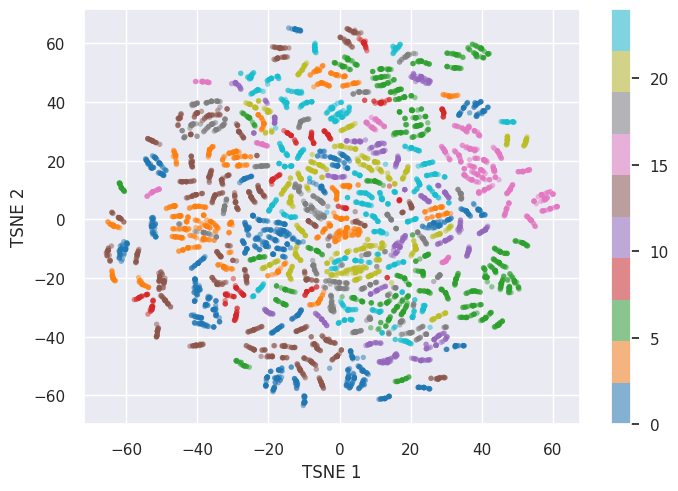

In [39]:
%%time
from cuml import TSNE
tsne_cuml = TSNE()
X_tsne = tsne_cuml.fit_transform(X_test)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

### Conclusion

1. 
The K-nearest neighbors (KNN) algorithms are a supervised type of machine learning algorithms that are extremely easy to implement and can perform quite complex classification tasks as well. All data is used for training while classifying a new data instance. It doesn't assume anything about the underlying data that is why it is a non-parametric algorithm used for classification and regression. As seen above, kNN shows the highest score when comparing with logistic regression, decision tree, or random forest. 

Simply put, the k-NN algorithm classifies unknown data points by finding the most common class among the k-closest examples. Each data point in the k closest examples casts a vote and the category with the most votes wins! Here we can see the data set includes 26 categories of images and that each of the data points within each respective category is grouped relatively close together in an n-dimensional space, so when a test data point was introduced, kNN would help that point finds its way to the same neighborhood category easier


kNN is famous for its practical application in handwriting detection, image recognition, and video recognition, and since our dataset falls exactly to the type of image realization, kNN is expected to perform with a better result. 

2. 
My several first attempts to predict American sign language on test data (or unseen data generated automatically) with Pycaret always results as an error even though every step was followed strictly. Even though the fit and score function are called by using newly generated model successfully, it still could not handle the predict_model function which is implemented in Pycaret. After getting some suggestions from the professor, I am able to handle it and get a remarkable result by simply change the "label" column into  "category" type instead of having its original type which is float. 

After researching, I can figure out that each feature in the dataset has an associated data type such as numeric feature, categorical feature, or date-time feature and PyCaret’s inference algorithm automatically detects the data type of each feature. However, sometimes the data types inferred by PyCaret are incorrect which requires us to change it to the type we need before sending them for testing or training

In this kind of dataset which is image processing, we want to distinguish input variable (X) into different categories, represented in numerical values instead of alphabetic letters. The reason why numbers are used instead of letters (I believe) is that machines process and learns easier with numbers compare with strings. My assumption is that since Pycaret automatically marks our target "label" as a numerical value, and the nature of this data set has two missing numbers which are 9 for letter J and 25 for letter Z (they are motion gestures), which makes Pycaret confused when dealing with it orderly (or any other way Pycaret uses to deal with numbers), which results as an error when using the model to predict the test data set. However, the whole purpose of doing this project is to make machine learns to recognize and characterize gestures into a number (or letter), there is no number dealing process here, which makes changing target column to "categorical" type works perfectly.